  # Medical Cost Personal Insurance Project

# Project Description

In [118]:
#importing Essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Data collection

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df.shape

(1338, 7)

In [121]:
#Checking random records of dataset
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
403,49,male,32.300,3,no,northwest,10269.46000
236,18,female,26.730,0,no,southeast,1615.76670
1075,32,female,29.590,1,no,southeast,4562.84210
322,34,male,30.800,0,yes,southwest,35491.64000
817,23,male,37.100,3,no,southwest,3597.59600
149,19,male,28.400,1,no,southwest,1842.51900
398,64,male,25.600,2,no,southwest,14988.43200
1238,37,male,22.705,3,no,northeast,6985.50695
1207,36,male,33.400,2,yes,southwest,38415.47400
747,19,male,21.755,0,no,northwest,1627.28245


In [122]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Converting Cateogrical into Binary number

In [123]:
# encoding sex column
df.replace({'sex':{'male' : 0,'female': 1}},inplace =True)

# encoding smoker column
df.replace({'smoker':{'yes' : 1 , 'no' : 0}},inplace = True)

# encoding region column
df.replace({'region':{'southeast':0, 'southwest': 1, 'northeast': 2,
                          'northwest': 3}}, inplace = True)

In [124]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


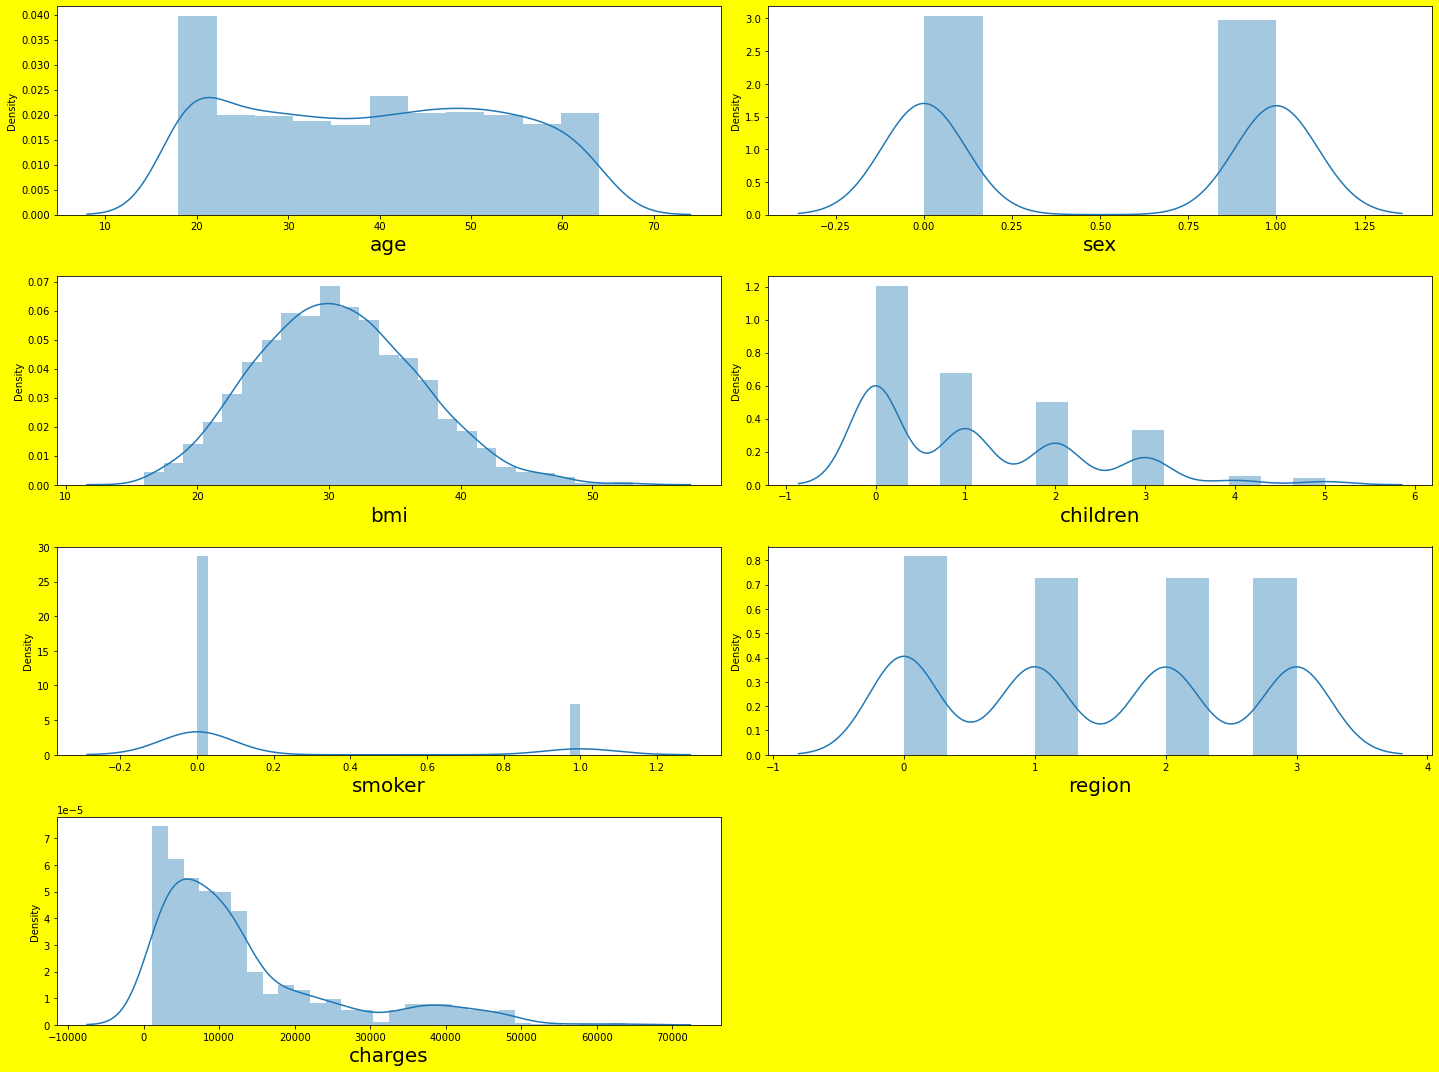

In [125]:
#Checking for data distribution

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15), facecolor = 'yellow')
plotnumber = 1 #this is an initiator

for column in df:
    if plotnumber <8: #here 7 is the number of features
        ax = plt.subplot (4,2, plotnumber)
        sns.distplot (df [column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()

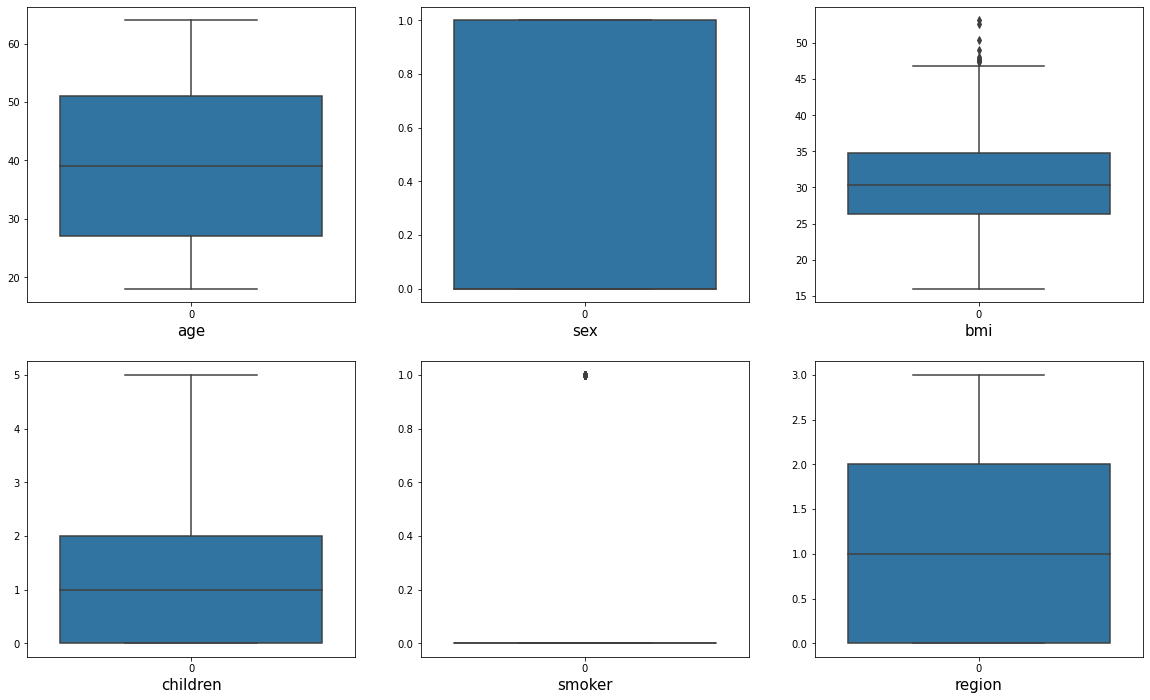

In [126]:
#Checking for outliers

plt.figure (figsize = (20,25))
graph = 1 #Initiator

for column in df:
    if graph <=6: 
        plt.subplot (4,3, graph)
        ax = sns.boxplot (data = df[column],)
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show()

In [127]:
# splitting features & labels

x=df.drop('charges', axis=1)
y= df.charges

In [128]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3
1334,18,1,31.920,0,0,2
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [129]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

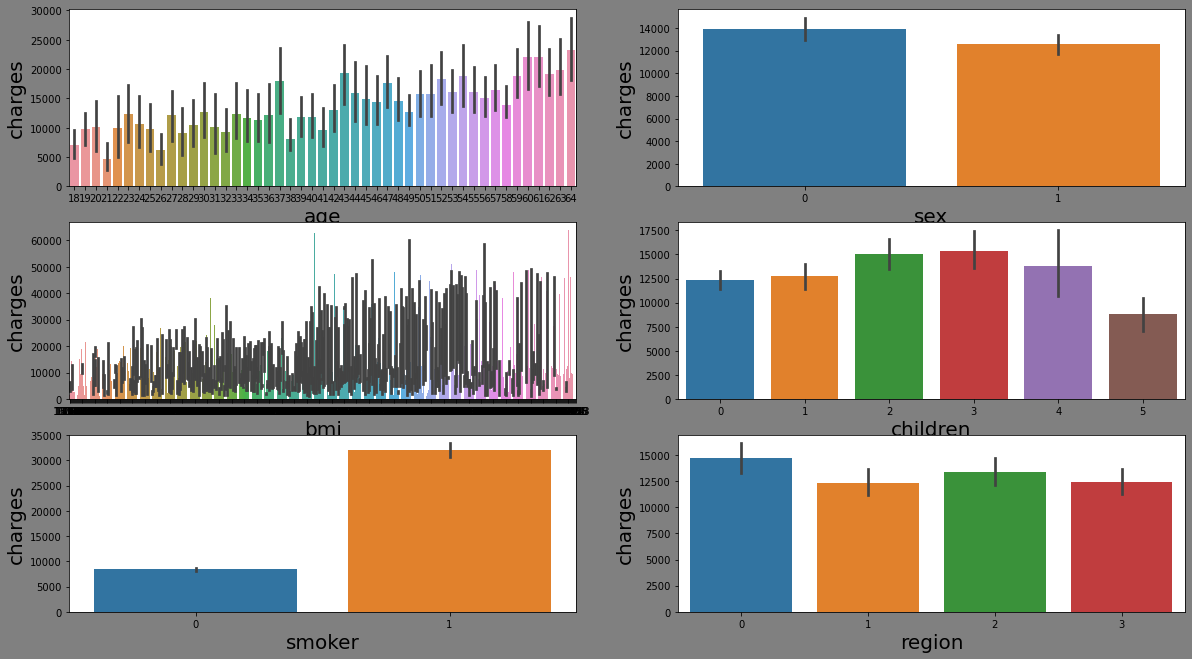

In [130]:
#visualizing relationship


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,15), facecolor = 'grey')
plotnumber = 1 #this is an initiator

for column in x:
    if plotnumber <7: #here 6 is the number of features
        ax = plt.subplot (4,2, plotnumber)
        sns.barplot (x [column],y)
        
        plt.xlabel (column, fontsize =20)
        plt.ylabel ('charges', fontsize =20)
    plotnumber +=1
plt.show()

<AxesSubplot:>

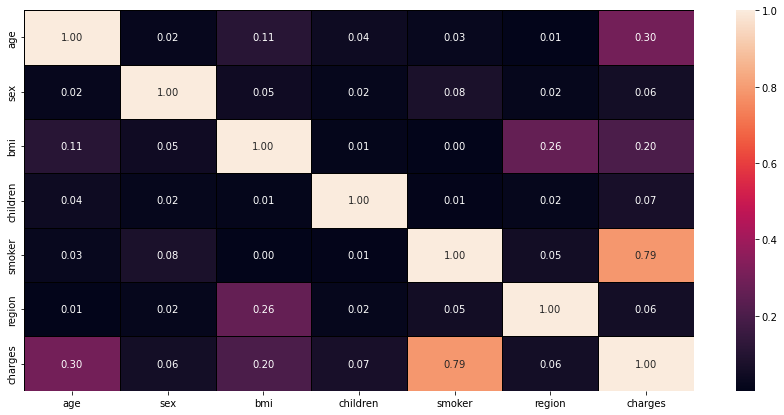

In [131]:
#checking the corelation using heatmaps (only absolute values)

plt.figure(figsize = (15,7))
sns.heatmap(df.corr().abs(), annot = True, linewidths=0.5, linecolor  = "black", fmt='.2f')

In [132]:
# dropping "region " column 

x  = x.drop(columns=['region'])
x

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


# Using Standard Scaler

In [133]:
# data scaling 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#y_scaled = scaler.fit_transform(y)
x_scaled
#y_scaled

array([[-1.43876426,  1.0105187 , -0.45332   , -0.90861367,  1.97058663],
       [-1.50996545, -0.98959079,  0.5096211 , -0.07876719, -0.5074631 ],
       [-0.79795355, -0.98959079,  0.38330685,  1.58092576, -0.5074631 ],
       ...,
       [-1.50996545,  1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ],
       [-1.29636188,  1.0105187 , -0.79781341, -0.90861367, -0.5074631 ],
       [ 1.55168573,  1.0105187 , -0.26138796, -0.90861367,  1.97058663]])

In [134]:
#train test split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = 0.2, random_state = 42)

In [135]:
print(x_scaled.shape, x_train.shape, x_test.shape)

(1338, 5) (1070, 5) (268, 5)


In [136]:
print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


# Model Training

In [137]:
# Loading linear regression model
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

# Model Evaluation

In [138]:
# prediction on training data
training_data_prediction =lr.predict(x_train)

In [139]:
# R squared value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.7410888590280913


In [140]:
# prediction on testing data
test_data_prediction = lr.predict(x_test)

In [141]:
# R squared value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value: ',r2_test)

R squared value:  0.7811302113434095


# Building a Predictive System

In [152]:
input_data = (33,1,36.29,3,0)

#changing input_data to numpy array
input_data_as_numpy_array = np.array(input_data)

#reshaping array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])

[206467.28055611]
The insurance cost is USD  206467.28055610962


# END